# Imports

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from sunpy.coordinates import Helioprojective, HeliographicStonyhurst

from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import RotatedSunFrame

start_time = '2010-09-10 12:34:56'
point = SkyCoord(187*u.arcsec, 283*u.arcsec, obstime = start_time, frame=HeliographicStonyhurst)

durations = [2,6]*u.day#np.concatenate([range(-5, 0), range(1, 6)]) * u.day
diffrot_point = RotatedSunFrame(base=point, duration=durations)

transformed_diffrot_point = diffrot_point.transform_to(HeliographicStonyhurst)
print(transformed_diffrot_point)

# fig = plt.figure()
# ax = fig.add_subplot(projection=aiamap)
# aiamap.plot(axes=ax, clip_interval=(1., 99.95)*u.percent)

# ax.plot_coord(point, 'ro', fillstyle='none', label='Original')
# ax.plot_coord(transformed_diffrot_point, 'bo', fillstyle='none',
#               label='Rotated')
# ax.legend()

# plt.show()

<HeliographicStonyhurst Coordinate (obstime=2010-09-10T12:34:56.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    [(28.70459323, 0.07861111, 695700.),
     (86.00989081, 0.07861111, 695700.)]>


TypeError: Coordinate frame HeliographicStonyhurst got unexpected keywords: ['observer']

<SkyCoord (HeliographicStonyhurst: obstime=2010-09-10T12:34:56.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    (-0.15833333, 0.03333333, 2.)>


TypeError: Coordinate frame HeliographicStonyhurst got unexpected keywords: ['observer']

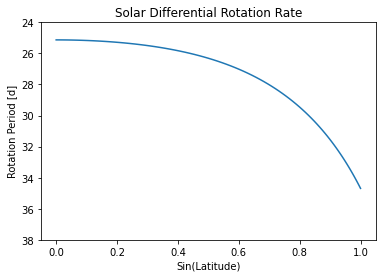

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import TimeDelta

import sunpy.data.sample
import sunpy.map


from sunpy.coordinates import Helioprojective, HeliographicStonyhurst
from sunpy.physics.differential_rotation import diff_rot, solar_rotate_coordinate
from sunpy.time import parse_time

latitudes = np.arange(0, 90, 1) * u.deg
dt = 1 * u.day
rotation_rate = [diff_rot(dt, this_lat) / dt for this_lat in latitudes]
rotation_period = [360 * u.deg / this_rate for this_rate in rotation_rate]

plt.figure()
plt.plot(np.sin(latitudes), [this_period.value for this_period in rotation_period])
plt.ylim(38, 24)
plt.ylabel('Rotation Period [{}]'.format(rotation_period[0].unit))
plt.xlabel('Sin(Latitude)')
plt.title('Solar Differential Rotation Rate')




start_time = '2010-09-10 12:34:56'
duration = 25*u.hour
c = SkyCoord(-570*u.arcsec, 120*u.arcsec, 2*u.km, obstime=start_time, frame=HeliographicStonyhurst)
print(c)
solar_rotate_coordinate(c, time=duration)

In [3]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import Helioprojective, HeliographicStonyhurst
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.time import parse_time

start_time = parse_time('2010-06-10 12:34:56')
end_time = parse_time('2010-06-12 12:34:56')
duration = 25*u.hour
c = SkyCoord(-570*u.arcsec, 120*u.arcsec, obstime=start_time, frame=HeliographicStonyhurst)
new_observer = SkyCoord(lon=20*u.deg, lat=8*u.deg, radius=0.9*u.au, obstime=end_time, frame=HeliographicStonyhurst)
solar_rotate_coordinate(c, observer=new_observer)

TypeError: Coordinate frame HeliographicStonyhurst got unexpected keywords: ['observer']

In [8]:
import netCDF4 as nc # https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648
# https://www.ngdc.noaa.gov/stp/satellite/goes/doc/GOES_XRS_readme.pdf
# with open("./test2.nc", 'rb') as fp:
ds = nc.Dataset("./goes16onemin.nc")

# print(ds)
# for var in ds.variables.values():
#     print(var)
print(ds)
xrs1 = ds["xrsb_flux"]
xrs2 = ds["xrsb2_flux"]
time = ds["time"]
for i in range(10):
    # if int(str(mint)[-1])<7:
    print("xrs1:", xrs1[i])
    print("xrs2:", xrs2[i])
    print("time:", time[i])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, Spase v2.2.6
    title: L2 XRS 1 minute average
    summary: The EXIS X-Ray Sensor (XRS) measures in a short wavelength channel (XRS-A) between 0.05 and 0.4 nm and in a longer wavelength channel (XRS-B) between 0.1 and 0.8 nm. The X-ray flux average product consists of 1 minute averages of the 1-s X-ray solar measurements. Flux is provided with and without electron contamination removed.
    keywords: NumericalData.MeasurementType.Irradiance
    keywords_vocabulary: SPASE: Space Physics Archive Search and Extract Data Model version 2.2.6, GCMD: NASA Global Change Master Directory (GCMD) Earth Science Keywords version 8.5
    naming_authority: gov.nesdis.noaa
    history: See algorithm information.
    source: GOES-R EXIS/XRS L2 xrsf-l2-flx1s
    processing_level: Level 2
    processing_level_description: Derived products
    license: These data may be redistributed and used 

In [1]:
import os

import numpy as np
import pandas as pd

import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
# from sunpy.data.sample import AIA_193_IMAGE, HMI_LOS_IMAGE

import astropy.time
from astropy.visualization import ImageNormalize, SqrtStretch



In [2]:
import matplotlib.pyplot as plt


import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import datetime as dt

# Tests

In [6]:
fp = open('/sanhome/jhou/srs-data/2017_SRS/20170912SRS.txt', 'r')
date = ''
data = []
nextline = False
for line in fp.readlines():
    line = line.rstrip("\n")
    if line[0:8] == ":Issued:":
        date = line[len(line)-21:]
    
        # print(line[0:10])
    if line[0:3] == "IA.":
        nextline = False
        # break
    if nextline:
        print(line)
        data.append([word for word in line.split(" ") if word != ""])
    if line[0:4] == "Nmbr" and "Area  Z   LL   NN Mag Type" in line:
        nextline = True

print(data)

# fp.close()

2674 N16W91   101  0030 Hrx  01   02 Alpha
2680 N09E53   317  0080 Hsx  02   01 Alpha
[['2674', 'N16W91', '101', '0030', 'Hrx', '01', '02', 'Alpha'], ['2680', 'N09E53', '317', '0080', 'Hsx', '02', '01', 'Alpha']]


In [7]:
fp = open('/sanhome/jhou/events-data/2021_events/20210321events.txt', 'r')

print(fp.read())
  
fp.close()
# Nmbr Location  Lo  Area  Z   LL   NN Mag Type
ay = "2674 N16W91   101  0030 Hrx  01   02 Alpha"
data = [word for word in ay.split(" ") if word != ""]
# print (data)

:Product: 20210321events.txt
:Created: 2021 Mar 24 0357 UT
:Date: 2021 03 21
# Prepared by the U.S. Dept. of Commerce, NOAA, Space Weather Prediction Center
# Please send comments and suggestions to SWPC.Webmaster@noaa.gov 
#
# Missing data: ////
# Updated every 5 minutes.
#                            Edited Events for 2021 Mar 21
#
#Event    Begin    Max       End  Obs  Q  Type  Loc/Frq   Particulars       Reg#
#-------------------------------------------------------------------------------

7460       1530   1538      1543  G17  5   XRA  1-8A      B1.3    8.1E-05       

7470       1609   1618      1627  G17  5   XRA  1-8A      B1.2    1.0E-04   2811

7480       1805   1818      1831  G17  5   XRA  1-8A      B1.6    1.8E-04       

7490 +     1851   1901      1914  G16  5   XRA  1-8A      B1.3    1.5E-04   2810

7500       2137   2146      2155  G16  5   XRA  1-8A      B1.2    1.2E-04   2811



In [ ]:
fp2 = open('/sanhome/jhou/srs-data/2017_SRS/20170912SRS.txt', 'r')
print(fp2.read())
fp2.close()

In [4]:
ac = {}
ac["date"] = 2, 3, 4
ac[1111] = 2, 3, 4, 5
print("\nDictionary after adding 3 elements: ")
print(ac)

months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
print(months)
date = '2010 Nov 06'
print(convertDate(date))
int(date.split(' ')[2])


Dictionary after adding 3 elements: 
{'date': (2, 3, 4), 1111: (2, 3, 4, 5)}
{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
2010-11-06


6

In [ ]:
'goes-xrs-reports/' in f'goes-xrs-reports/'
print(convertDatev1('31777101231'))
# print(len("lsjdf"))
print("875875".isnumeric())
#f'/sanhome/jhou/goes-xrs-reports/goes_xray_event_list_2010.txt' in '/sanhome/jhou/goes-xrs-reports/'

In [ ]:
a = np.array([[1,2],5, [3,4]])
# a.flatten()
# array([1, 2, 3, 4])
a.flatten('K')
# array([1, 3, 2, 4])

In [ ]:
# directory = f'/sanhome/jhou/{reportName}/goes_xray_event_list_{year}.txt'


def parseEventData(directory, skippedLines): # parse text file
    count = skippedLines
    # if (reportName == ")
    with open(directory) as fp3:
        data = []
        for line in fp3.readlines():
            if count <= 0:
                line = line.rstrip("\n")
                data.append([word for word in line.split(" ") if word != ""])

            else:
                count -= 1
        # print(data)
        return data
        
        

def getEventData(reportType, year, file=''):
    if file != '':
        skippedLines = 6 #if ('goes-xrs-reports' == reportType or 'goes-xrs-reports-HER' in reportType) else 0
        # print(file)
        directory = f'{reportType}/{file}'
        data = parseEventData(directory, skippedLines)
        
    else:
        if 'goes-xrs-reports' == reportType:
            skippedLines = 6
            directory = f'/sanhome/jhou/{reportType}/goes_xray_event_list_{year}.txt'
            data = parseEventData(directory, skippedLines)
        elif 'goes-xrs-reports-HER' in reportType:
            skippedLines = 6
            directory = f'/sanhome/jhou/{reportType}/goes_xray_event_list_{year}_HER.txt'
            data = parseEventData(directory, skippedLines)
        else:
            skippedLines = 0
            if year == '2017':
                directory = f'/sanhome/jhou/{reportType}/goes-xrs-report_{year}-ytd.txt'
                data = parseEventData(directory, skippedLines)
            elif year == '2015':
                directory = f'/sanhome/jhou/{reportType}/goes-xrs-report_{year}_modifiedreplacedmissingrows.txt'
                data = parseEventData(directory, skippedLines)
            else:
                directory = f'/sanhome/jhou/{reportType}/goes-xrs-report_{year}.txt'
                data = parseEventData(directory, skippedLines)
    return data

def convertDatev2(date):
    # tempyr = date[5:7]
    times = date.split("-")
    year = int(times[2])
    month = int(months[times[1]])
    day = int(times[0])
    return dt.date(year, month, day)

def organizeDatav2(data): # organize data downloaded from Kim's email
    newdata = []
    for record in data:
        event = {}
        event["DATE"] = convertDatev2(record[0])
        event["START"] = record[1][0:2]+record[1][3:5]
        event["PEAK"] = record[2][0:2]+record[2][3:5]
        event["END"] = record[3][0:2]+record[3][3:5]
        event["MAGNITUDE"] = record[4]
        if(len(record) == 5):
            event["LOCATION"] = ""
            event["ARNUMBER"] = ""
        elif(len(record) == 6):
            if(record[5].isnumeric()):
                event["LOCATION"] = ""
                event["ARNUMBER"] = record[5]
            else:
                event["LOCATION"] = record[5]
                event["ARNUMBER"] = ""
        elif(len(record) == 7):
            event["LOCATION"] = record[5]
            event["ARNUMBER"] = record[6]
        else:
            pass

        
        newdata.append(event)
    return newdata

def flatten(l):
    return l

def mergeLists(list1, list2): # for each item in list 1, compare the DATE and the PEAK time to that in list 2      if there is match, compare items in each list, add a new column in df for new mag if it exists
    newlist = []
    uniquelist = []
    
    for event2 in list2:
        match = False
        for event1 in list1:
            print(event1)
            if(event1["DATE"] == event2["DATE"] and event1["PEAK"] == event2["PEAK"]):
                match = True
                newevent = event2
                magnitudes = []
                if(event1["MAGNITUDE"] == event2["MAGNITUDE"]): #1
                  
                    magnitudes.append(event2["MAGNITUDE"])
                    newevent["MAGNITUDE"] = magnitudes
                    print("type1")
                    # print(event1)
                    # print(event2)
                    # print(magnitudes)
                    newlist.append(newevent)
                    break
                else: #2
                    magnitudes.append(event1["MAGNITUDE"])
                    magnitudes.append(event2["MAGNITUDE"])
                    # flatmag = flatten(magnitudes) # WRITE THIS FUNCTION
                    print("type2")
                    # print(event1)
                    # print(event2)
                    # print(magnitudes)
                    newevent["MAGNITUDE"] = magnitudes
                    newlist.append(newevent)
                    break
        if not match:
            print("type3")
            # print(event2)
            newlist.append(event2) #3
            
    
            
#             match = False
#             if(event1["DATE"] <= event2["DATE"]):
#                 if event1["PEAK"] == event2["PEAK"]:
                    # newevent = event2
                    # magnitudes = []
                    
#                     if(event1["MAGNITUDE"] == event2["MAGNITUDE"]): #1
#                         magnitudes.append(event2["MAGNITUDE"])
#                         newevent["MAGNITUDE"] = magnitudes
#                         print("1")
#                         print(magnitudes)
#                     else: #2
#                         magnitudes.append(event1["MAGNITUDE"])
#                         magnitudes.append(event2["MAGNITUDE"])
#                         # flatmag = flatten(magnitudes) # WRITE THIS FUNCTION
#                         print("2")
#                         print(event1)
#                         print(event2)
#                         print(magnitudes)
#                         newevent["MAGNITUDE"] = magnitudes
#                     match = True
                    
#                     newlist.append(newevent)
                
#             else: 
#                 if not match:
#                     # print("3")
#                     # print(event2)
#                     newlist.append(event2) #3
#                 break
    for event1 in list1:
        match2 = False
        print(event1)
        for event2 in list2:
            if(event1["DATE"] == event2["DATE"] and event1["PEAK"] == event2["PEAK"]):
                match2 = True
                break
        if not match2:
            print("type4")
            # print(event1)
            
            newlist.append(event1) #4
    return newlist


def makeFinalList(splitByYear=False, year=''):
    if splitByYear:
        # temp1 = getEventData('old-goes-xrs-reports', str(year))
        temp2 = getEventData('goes-xrs-reports', str(year))
        temp3 = getEventData('goes-xrs-reports-HER', str(year))
        
        # report1 = organizeDatav1(temp1)
        report2 = organizeDatav2(temp2)
        report3 = organizeDatav2(temp3)
        
        twolistsmerged = mergeLists(report2, report3)
        
        # newlist = mergeLists(twolistsmerged, report3)
        
    else:
        reportTypes = ['goes-xrs-reports', 'goes-xrs-reports-HER']#['old-goes-xrs-reports', 'goes-xrs-reports', 'goes-xrs-reports-HER']
        reports = []
        for i in range(len(reportTypes)):
            path = f"/sanhome/jhou/{reportTypes[i]}"
            report = []
            files = [item for item in os.listdir(path) if item[0:2]!="._"]
            for file in files:
                # print([item for item in os.listdir(path) if item[0:2]!="._"])
                temp1 = getEventData(path, str(year), file)
                temp2 = organizeDatav2(temp1)#organizeDatav1(temp1) if (i==0) else organizeData2(temp1)
                
                    
                report.append(temp2)
            reports.append(report)
        
        noaa = [item for years in reports[0] for item in years]
        her = [item for years in reports[1] for item in years]
        twolistsmerged = mergeLists(noaa, her)
        
        # newlist = mergeLists(twolistsmerged, reports[2])
        
    return twolistsmerged #newlist
        
dataa = makeFinalList()  
print(dataa)
# getEventData('2010', 'goes-xrs-reports')
        
        # compare peak time and date to find same flares, create a list of lists containing their contents and data, in separate step, merge all like data, but put two mag values

# Get Data

### Download All NOAA

In [27]:

# from ftplib import FTP
# import tarfile

# ftp = FTP('ftp.swpc.noaa.gov')
# ftp.login()
# ftp.cwd('pub/warehouse/1996')

# print(ftp.nlst())

# with open('./test.tar.gz', 'wb') as fp:
#     ftp.retrbinary("RETR" + '2017_SRS.tar.gz', fp.write)
    
# with tarfile.open('./test.tar.gz') as fp:
#     fp.extractall('./')



def extractData(path):
    # return path
    with open(path, "r") as fp:
        date = ''
        data = []
        nextline = False
        for line in fp.readlines():
            line = line.rstrip("\n")
            if line[0:8] == ":Issued:":
                date = line[len(line)-20:len(line)-38]
                # print(date.split(" "))

                # print(line[0:10])
            if line[0:3] == "IA.":
                nextline = False
                # break
            if nextline:
                # print(line)
                data.append([word for word in line.split(" ") if word != ""])
            if line[0:4] == "Nmbr" and "Area  Z   LL   NN Mag Type" in line:
                nextline = True
                
    return date, data
            
# print(fp)
# txt = fp.read()

# fp.close()
# print(txt)

years = []
for i in range(2010, 2022):
    years.append(i)

#[{arnum1: {dates:[], location:[], classification:[] ...}}, {arnum2: {dates:[], location:[], classification:[] ...}} ...]

def convertDate(date):
    dlist = date.split(' ')
    dlist[1] = months[dlist[1]]
    dlist = [int(d) for d in dlist]
    
    return dt.date(dlist[0], dlist[1], dlist[2])
    
    
def getData():
    # dates = []
    # dataall = []
    # arnumraw = []
    # arnums = []
    
    finallist = []
    finallist2 = []
    for year in years:
        dates = []
        dataall = []
        arnumraw = []
        arnums = []
        path = f"/sanhome/jhou/srs-data/{year}_SRS"
        for file in os.listdir(path):
            # print(f"{path}/{file}")
            date, data = extractData(f"{path}/{file}")
            # print (da)
            try:
                if data[0][0] != 'None':

                    temparnums = [num[0] for num in data]
                    arnumraw.append(temparnums)

                    # newdate = convertDate(date)


                    for ar in temparnums:
                        temp = []
                        temp.append(ar)
                        temp.append(date)
                        dates.append(temp)

                    dataall.append(data)
            except:
                pass
                
        arnumraw = [item for sublist in arnumraw for item in sublist]
        # print(dates)
        [arnums.append(x) for x in arnumraw if x not in arnums]
        # print(arnums)
        # print(dataall)

        for arnum in arnums:
            ardict = {}
            subdict = {}
            arnumdata = [a for day in dataall for a in day if a[0] == arnum]
            reordereddates = [date[1] for date in dates if date[0] == arnum]
            # print(reordereddates)
            for i in range(len(reordereddates)):
                # arnumdata[i].pop(0)
                arnumdata[i].append(reordereddates[i])
            # print(arnumdata)
            for instance in arnumdata:
                if len(instance) == 9:
                    # print(instance)
                    subdict["ARNUM"] = arnum
                    subdict["DATE"] = instance[8]
                    subdict["LOCATION"] = instance[1]
                    subdict["MAG_TYPE"] = instance[7]
                    subdict["LONGITUDE"] = instance[2]
                    subdict["AREA"] = instance[3]
                    subdict["ZURICH_CLASSIFICATION"] = instance[4]
                    subdict["LONG_EXTENT"] = instance[5]
                    subdict["NUM_SUNSPOTS"] = instance[6]
                finallist2.append(subdict)
            ardict[arnum] = subdict


            # for arnumdata 
            # ardict[arnum] = arnumdata
            finallist.append(ardict)
            # print(arnumdata)

        # print(finallist)
    # print(data)
    return date, finallist, finallist2
date, data2, data3 = getData()
# print(h)
import json

with open('srs-data-by-AR.json', 'w') as f:
    json.dump(data2, f)
    
with open('srs-data.json', 'w') as f:
    json.dump(data3, f)

In [ ]:
years = []
for i in range(2010, 2022):
    years.append(i)
year = 2022
print(f"/Users/jhou/Downloads/{year}_SRS")


In [ ]:
import gzip
s = b'This is GFG author, and final year student.'
s = gzip.compress(s)
print(s)

# using gzip.decompress(s) method
t = gzip.decompress(s)
print(t)

### GOES

### AIA

In [ ]:
from sunpy.data.sample import AIA_193_IMAGE, HMI_LOS_IMAGE

In [ ]:
# def getAIAImage(year, month, day, cadence): #EUV wavelength around 135-171 angstroms 
t0 = astropy.time.Time('2012-09-24T14:56:03', scale='utc', format='isot')
query = Fido.search(
    a.Instrument.aia,
    a.Physobs.intensity,
    a.Wavelength(172*u.angstrom),
    a.Time(t0, t0 + 13*u.s),
)
files = Fido.fetch(query)
amap = sunpy.map.Map(files)

### HMI

In [ ]:
def getHMIImage(year, month, day, startdate, enddate): 
    # return year + '/' + month + '/'+ day + ' ' + startdate, year + '/' + month + '/'+ day + ' ' + enddate
    return Fido.search(a.Time(year + '/' + month + '/'+ day + ' ' + startdate, year + '/' + month + '/'+ day + ' ' + enddate), a.Instrument.hmi, a.Physobs.los_magnetic_field)

# print(getHMIImage('2020', '01', '20', '00:00:00', '00:01:00'))
hmiIMG = getHMIImage('2020', '01', '20', '00:00:00', '00:01:00')
query = Fido.fetch(hmiIMG)

print(query)

In [ ]:
hmimap = sunpy.map.Map(hmiIMG)

# Extract Active Region By Input

# Get Light Curves

### GOES X-Ray Light Curve

### EUV Light Curve

### Magnetic Flux Light Curve

# Stack Light Curves

# Save Image and Light Curves

# Run Code, Define Cadence

# Make Movie

# Extract Mag Loops

# Plot Filament Properties